Liquid Crystal Statistics (Theory and Simulation)
======================================

In [1]:
import sys
sys.path.insert(1, '../wlcstat/')

In [2]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine
import wlcstat.active_brown as active_brown

#from wlcstat.wlcave import *
#from wlcstat.wlcgreen import *

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)
importlib.reload(active_brown)

<module 'wlcstat.active_brown' from '/Users/asheshghosh/Documents/Research/Project/Liquid_Crystal/lc_thermo/wlcstat/active_brown.py'>

Order parameter comparison between simulation and theory 

In [4]:
n_p = 15
n_b = 100
length_kuhn = 5
i_snap_0 = 1000
i_snap_f = 10000

gamma_0 = 1e-4
gamma_f = 30
gamma = np.linspace(gamma_0,gamma_f,n_p)

In [5]:
u = np.loadtxt('data_simulation/u1')
print(len(u[:,0]))

1500


In [6]:
np.loadtxt('data_simulation/u1000')

array([[ 0.82838306,  0.55737838,  0.05577496],
       [ 0.47914635,  0.84714176,  0.22971636],
       [ 0.52554728,  0.84303361,  0.1144307 ],
       ...,
       [-0.25153773, -0.44547522,  0.85923256],
       [-0.31587026, -0.10638551,  0.94281923],
       [ 0.15422523,  0.14119875,  0.97789442]])

In [7]:
m_sim = np.zeros(n_p)
m_th = np.zeros(n_p)

for i_p in range(n_p):
    m_th[i_p] = wlc_lcpoly.m_lcpoly(length_kuhn, gamma[i_p], alpha_max=25, l_cont_frac_max=50)
    
for i_snap in range(i_snap_0, i_snap_f + 1):
    u_snap = np.loadtxt('data_simulation/u' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b
        u_i = u_snap[i_0:i_f, :]
        m_sim[i_p] += np.sum(1.5 * u_i[:, 2] ** 2 - 0.5) / (n_b * (i_snap_f - i_snap_0 + 1))

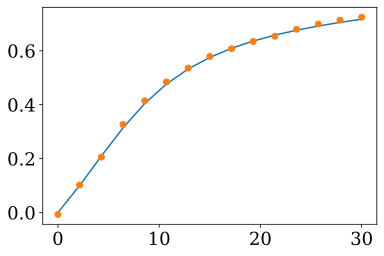

In [13]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(gamma, m_th,'-',color='C0')
plt.plot(gamma, m_sim,'o',color='C1')

In [9]:
r2_par_sim = np.zeros(n_p)
r2_par_th = np.zeros(n_p)
r2_perp_sim = np.zeros(n_p)
r2_perp_th = np.zeros(n_p)

for i_p in range(n_p):
    r2_par_th[i_p], r2_perp_th[i_p], xi_par, xi_perp = wlc_lcpoly.r_2_lcpoly(length_kuhn, gamma[i_p], alpha_max=8)
    
for i_snap in range(i_snap_0, i_snap_f + 1):
    r_snap = np.loadtxt('data_simulation/r' + str(i_snap))
    for i_p in range(n_p):
        i_0 = n_b * i_p
        i_f = i_0 + n_b
        r_i = r_snap[i_0:i_f, :]
        r2_par_sim[i_p] += (r_i[0,2] - r_i[-1,2]) ** 2 / (i_snap_f - i_snap_0 + 1)
        r2_perp_sim[i_p] += (r_i[0,0] - r_i[-1,0]) ** 2 / (i_snap_f - i_snap_0 + 1) / 2
        r2_perp_sim[i_p] += (r_i[0,1] - r_i[-1,1]) ** 2 / (i_snap_f - i_snap_0 + 1) / 2

In [10]:
r2_zero = wlcave.r2_ave(length_kuhn)
r2_par_th_save = r2_par_th
m_th = np.zeros(n_p)

for i_p in range(n_p):
    m_th[i_p] = wlc_lcpoly.m_lcpoly(length_kuhn, gamma[i_p], alpha_max=25, l_cont_frac_max=50)


alpha_max = 50
l_max = 50

m = 0
poles_m0 = np.zeros((alpha_max - abs(m) + 1, n_p))
resi_m0 = np.zeros((l_max + 1, l_max + 1, alpha_max - abs(m) + 1, n_p))
select_mag = np.zeros(n_p)

for i_p in range(n_p):
    r2_par_th[i_p], r2_perp_th[i_p], xi_par, xi_perp = wlc_lcpoly.r_2_lcpoly(length_kuhn, gamma[i_p], alpha_max=10)

    poles_m0[:,i_p] = wlc_lcpoly.eval_poles_lcpoly(gamma[i_p], 0, alpha_max=alpha_max)
    poles = poles_m0[:,i_p]
    resi_m0[:,:,:,i_p] = wlc_lcpoly.eval_residues_lcpoly(gamma[i_p], 0, poles, l_zero_only=False, l_max=l_max, alpha_max=alpha_max, l_cont_frac_max=100)

    select_mag[i_p] = np.real(np.dot(resi_m0[:, :, ind_alpha_pp,i_p], np.dot(np.transpose(uz_select_mat),
            np.dot(resi_m0[:, :, ind_alpha_p,i_p], np.dot(uz_select_mat,resi_m0[:, :, ind_alpha,i_p]))))[0, 0])



/var/folders/l_/_p2_9s4x6sgbl7sh8tjclkyc0000gn/T/ipykernel_48038/313371577.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  resi_m0[:,:,:,i_p] = wlc_lcpoly.eval_residues_lcpoly(gamma[i_p], 0, poles, l_zero_only=False, l_max=l_max, alpha_max=alpha_max, l_cont_frac_max=100)


NameError: name 'ind_alpha_pp' is not defined

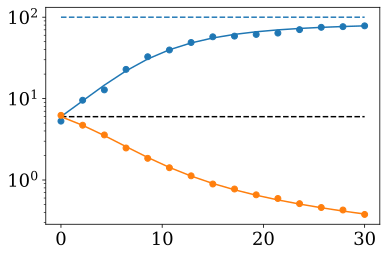

In [12]:
%config InlineBackend.figure_formats = ['svg']
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


#plt.plot(gamma, select_mag / resi_m0[0,0,0, :] * 4 * 2 * length_kuhn ** 2 / 2,'--',color='C0')
#plt.plot(gamma, select_mag / resi_m0[0,0,0, :] * 4 * 9 / 8 * length_kuhn ** 2 / 2,':',color='C0')
plt.plot(gamma, r2_par_th * 0 + r2_zero * 4 / 3 ,'k--')
plt.plot(gamma, r2_par_th * 4 ,'-',color='C0')
plt.plot(gamma, r2_par_th * 0 + 100 ,'--',color='C0')
plt.plot(gamma, r2_par_sim,'o',color='C0')
plt.plot(gamma, r2_perp_th * 4,'-',color='C1')
plt.plot(gamma, r2_perp_sim,'o',color='C1')

plt.yscale('log')


In [21]:
r2_par_th/r2_perp_th

array([  1.00003062,   2.02737931,   4.3817443 ,   9.41120506,
        18.84025832,  33.97997203,  55.03743991,  81.18045936,
       111.11171735, 143.58544283, 177.64371293, 212.64185987,
       248.18482969, 284.04928759, 320.12025618])

In [64]:
r_i[99,2]

15.639078902972777

In [110]:
alpha_max = 100
wlc_lcpoly.eval_a_l_m(np.arange(1, alpha_max + 2), 0)

array([0.57735027, 0.51639778, 0.50709255, 0.50395263, 0.50251891,
       0.50174521, 0.50128041, 0.50097943, 0.5007734 , 0.50062617,
       0.50051733, 0.50043459, 0.50037023, 0.50031918, 0.50027801,
       0.50024432, 0.5002164 , 0.50019301, 0.50017322, 0.50015632,
       0.50014178, 0.50012918, 0.50011819, 0.50010854, 0.50010003,
       0.50009248, 0.50008576, 0.50007974, 0.50007433, 0.50006946,
       0.50006505, 0.50006105, 0.5000574 , 0.50005407, 0.50005103,
       0.50004823, 0.50004566, 0.50004329, 0.5000411 , 0.50003907,
       0.50003718, 0.50003543, 0.50003381, 0.50003229, 0.50003087,
       0.50002954, 0.5000283 , 0.50002713, 0.50002603, 0.500025  ,
       0.50002403, 0.50002312, 0.50002225, 0.50002143, 0.50002066,
       0.50001993, 0.50001924, 0.50001858, 0.50001796, 0.50001736,
       0.5000168 , 0.50001626, 0.50001575, 0.50001526, 0.50001479,
       0.50001435, 0.50001392, 0.50001352, 0.50001313, 0.50001276,
       0.5000124 , 0.50001206, 0.50001173, 0.50001141, 0.50001

In [148]:
gam = 100
length_kuhn = 10
wlc_lcpoly.r_2_lcpoly(length_kuhn, gam, alpha_max=3, l_cont_frac_max=20)

(70.05428978252544,
 0.0675419815684597,
 169620.74838615736,
 0.05288544937660367)

In [118]:
10/3

3.3333333333333335

In [192]:
length_kuhn = 1
poles_vec = np.array([2, 2, 2.1])
print(wlc_lcpoly.calc_int_mag(length_kuhn, poles_vec))

poles_vec = np.array([2, 2, 2])
print(wlc_lcpoly.calc_int_mag(length_kuhn, poles_vec))

(3.82082037439352+0j)
(3.694528049465325+0j)


In [190]:
gamma = 30
poles_m0 = wlc_lcpoly.eval_poles_lcpoly(gamma, m=0, alpha_max=alpha_max)

In [182]:
poles_m0

array([ 1.01097028e+01,  1.00961410e+01, -5.80236756e+00, -7.58871531e+00,
       -1.67935952e+01, -2.58559407e+01, -3.76216596e+01, -5.14560203e+01,
       -6.73508853e+01, -8.52786207e+01, -1.05226756e+02, -1.27188223e+02,
       -1.51158790e+02, -1.77135788e+02, -2.05117464e+02, -2.35102627e+02,
       -2.67090441e+02, -3.01080309e+02, -3.37071794e+02, -3.75064567e+02,
       -4.15058381e+02, -4.57053045e+02, -5.01048410e+02, -5.47044357e+02,
       -5.95040794e+02, -6.45037644e+02, -6.97034845e+02, -7.51032348e+02,
       -8.07030111e+02, -8.65028097e+02, -9.25026280e+02, -9.87024633e+02,
       -1.05102314e+03, -1.11702177e+03, -1.18502053e+03, -1.25501938e+03,
       -1.32701833e+03, -1.40101737e+03, -1.47701647e+03, -1.55501565e+03,
       -1.63501489e+03, -1.71701418e+03, -1.80101352e+03, -1.88701290e+03,
       -1.97501233e+03, -2.06501179e+03, -2.15701129e+03, -2.25101082e+03,
       -2.34701037e+03, -2.44500996e+03, -2.54500957e+03, -2.64700920e+03,
       -2.75100885e+03, -

In [312]:
lam0 = 1e-1
lamf = 1e4
nlam = 100
lamvec = np.logspace(np.log10(lam0), np.log10(lamf), nlam)

alpha_max = 50
l_max = 50

m = 0
poles_m0 = np.zeros((alpha_max - abs(m) + 1, nlam))
resi_m0 = np.zeros((l_max + 1, l_max + 1, alpha_max - abs(m) + 1, nlam))
select_mag = np.zeros(nlam)

m = 1
poles_m0 = np.zeros((alpha_max - abs(m) + 1, nlam))
resi_m0 = np.zeros((l_max + 1, l_max + 1, alpha_max - abs(m) + 1, nlam))
select_mag = np.zeros(nlam)

a_l_m0 = np.zeros(alpha_max + 2)
a_l_m0[1::] = wlc_lcpoly.eval_a_l_m(np.arange(1, alpha_max + 2), 0)

l_eq_l0p1 = a_l_m0[1:(alpha_max + 1)]
uz_select_mat = np.diag(l_eq_l0p1, 1) + np.diag(l_eq_l0p1, -1)


ind_alpha = 0
ind_alpha_p = 1
ind_alpha_pp = 0

for i in range(nlam):
    lam = lamvec[i]
    poles_m0[:,i] = wlc_lcpoly.eval_poles_lcpoly(lam, 0, alpha_max=alpha_max)
    poles = poles_m0[:,i]
    resi_m0[:,:,:,i] = wlc_lcpoly.eval_residues_lcpoly(lam, 0, poles, l_zero_only=False, l_max=l_max, alpha_max=alpha_max, l_cont_frac_max=100)
    resi_m1[:,:,:,i] = wlc_lcpoly.eval_residues_lcpoly(lam, 1, poles, l_zero_only=False, l_max=l_max, alpha_max=alpha_max, l_cont_frac_max=100)


    select_mag[i] = np.real(np.dot(resi_m0[:, :, ind_alpha_pp,i], np.dot(np.transpose(uz_select_mat),
            np.dot(resi_m0[:, :, ind_alpha_p,i], np.dot(uz_select_mat,resi_m0[:, :, ind_alpha,i]))))[0, 0])


ValueError: could not broadcast input array from shape (51) into shape (50)

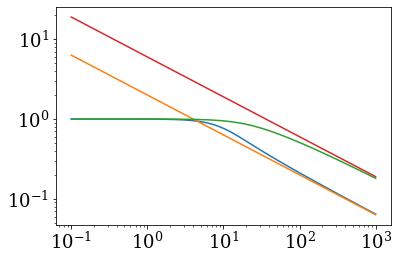

In [229]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ind_max = 1

i = 0
plt.plot(lamvec, residues_m0[:,0,0,i],'-')
plt.plot(lamvec, 2 / lamvec ** 0.5,'-')

i = 1
plt.plot(lamvec, residues_m0[:,1,1,i],'-')
plt.plot(lamvec, 6 / lamvec ** 0.5,'-')
    
#    plt.plot(lamvec, poles_m2[:,i] - poles_m0[:,0],'-',color='C2')
    
plt.xscale('log')
plt.yscale('log')

#plt.ylim([1e-3, 1e10])

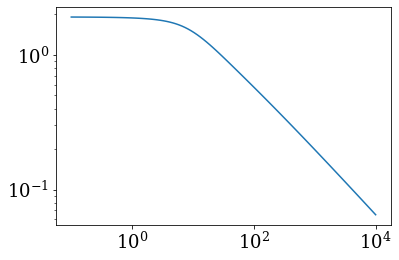

In [285]:
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ind_max = 1

plt.plot(lamvec, 2.25 - select_mag / resi_m0[0,0,0, :],'-')
#plt.plot(lamvec, 1 + 0 * lamvec,'-')
    
plt.xscale('log')
plt.yscale('log')

#plt.ylim([1e-3, 1e10])

In [286]:
9/4

2.25

In [304]:
alpha_max =4
a_l_m0 = np.zeros(alpha_max + 2)
a_l_m0[1::] = wlc_lcpoly.eval_a_l_m(np.arange(1, alpha_max + 2), 0)
l_eq_l0p1 = a_l_m0[1:(alpha_max + 1)]
uz_select_mat = np.diag(l_eq_l0p1, 1) + np.diag(l_eq_l0p1, -1)

In [305]:
uz_select_mat

array([[0.        , 0.57735027, 0.        , 0.        , 0.        ],
       [0.57735027, 0.        , 0.51639778, 0.        , 0.        ],
       [0.        , 0.51639778, 0.        , 0.50709255, 0.        ],
       [0.        , 0.        , 0.50709255, 0.        , 0.50395263],
       [0.        , 0.        , 0.        , 0.50395263, 0.        ]])

In [309]:
1 / a_l_m0[2] ** 2

3.750000000000001

In [311]:
a_l_m0[2] ** 2 - a_l_m0[1] ** 2

-0.06666666666666671